<a href="https://colab.research.google.com/github/tantowi-17/algorithma-pso/blob/master/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration: 1
Global best position: [4.505965890207133, 6.898906793929358, 6.105277958616684, 8.10823915017922, 5.546725514573968, 8.204196766643923, 5.004672052580762, 6.662422734013816, 7.169706108396593, 9.560353518166732]
Global best fitness: 0.25332490109487993
Iteration: 2
Global best position: [3.2255089387426423, 7.893455644968041, 5.903182270104906, 7.131997397214045, 6.445034581432683, 8.282612392179015, 5.127570815774954, 8.768573244786014, 7.973900804882055, 9.053755945903909]
Global best fitness: 0.23865050317667857
Iteration: 3
Global best position: [4.3948801630921785, 5.987702688513255, 7.0389117804395225, 7.2765442423887325, 6.44529097017929, 7.9943657547818, 5.505781131709402, 8.788579445550921, 7.662155556492627, 10]
Global best fitness: 0.14328192874773982
Iteration: 4
Global best position: [3.5296193049751645, 6.643672284365319, 7.606520407344358, 7.210824809741204, 6.417013703442877, 8.375595449511977, 5.758679002701705, 9.121095592907569, 8.62742731819678, 10]
Glo

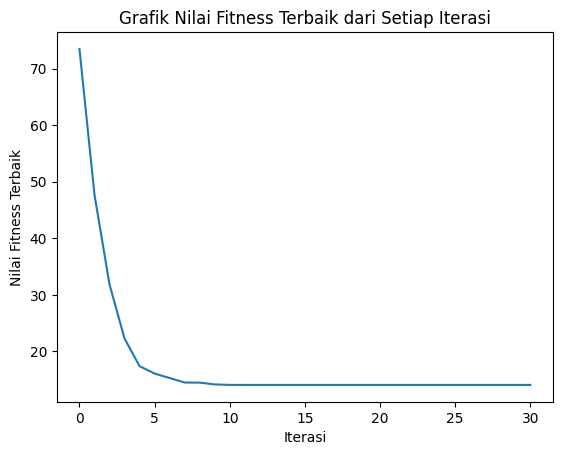

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Fungsi fitness untuk PSO
def fitness(x):
    # Data PLN 10 data
    data_pln = [5.3, 6.2, 5.6, 7.8, 9.1, 8.5, 7.4, 8.9, 6.7, 4.5]
    # Hitung rata-rata dan simpangan baku dari x
    mean = np.mean(x)
    std_dev = np.std(x)
    # Hitung fitness sebagai perbedaan antara rata-rata dan simpangan baku dari x dengan data PLN
    return abs(mean - np.mean(data_pln)) + abs(std_dev - np.std(data_pln))

# Fungsi PSO
def pso(num_particles, num_iterations):
    # Inisialisasi populasi awal dengan posisi dan kecepatan acak
    swarm = []
    for i in range(num_particles):
        position = [random.uniform(0, 10) for _ in range(10)]
        velocity = [random.uniform(-1, 1) for _ in range(10)]
        swarm.append({'position': position, 'velocity': velocity, 'best_position': position})
    # Inisialisasi global best dengan posisi partikel pertama
    global_best_position = swarm[0]['position']
    global_best_fitness = fitness(swarm[0]['position'])
    # Iterasi PSO
    for i in range(num_iterations):
        # Update posisi dan kecepatan setiap partikel
        for j in range(num_particles):
            # Update kecepatan partikel
            for k in range(10):
                r1 = random.random()
                r2 = random.random()
                swarm[j]['velocity'][k] = 0.5 * swarm[j]['velocity'][k] + 1.0 * r1 * (swarm[j]['best_position'][k] - swarm[j]['position'][k]) + 1.0 * r2 * (global_best_position[k] - swarm[j]['position'][k])
            # Update posisi partikel
            for k in range(10):
                swarm[j]['position'][k] += swarm[j]['velocity'][k]
                # Batasi posisi partikel agar tidak keluar dari rentang 0-10
                if swarm[j]['position'][k] < 0:
                    swarm[j]['position'][k] = 0
                elif swarm[j]['position'][k] > 10:
                    swarm[j]['position'][k] = 10
            # Update best_position dan best_fitness partikel
            if fitness(swarm[j]['position']) < fitness(swarm[j]['best_position']):
                swarm[j]['best_position'] = swarm[j]['position']
            if fitness(swarm[j]['best_position']) < global_best_fitness:
                global_best_position = swarm[j]['best_position']
                global_best_fitness = fitness(swarm[j]['best_position'])
        # Cetak hasil setiap iterasi
        print("Iteration:", i+1)
        print("Global best position:", global_best_position)
        print("Global best fitness:", global_best_fitness)
        print("==================================================")

# Jalankan fungsi PSO dengan 10 partikel dan 100 iterasi
# Jalankan PSO
pso(num_particles=30, num_iterations=100)

# Buat grafik nilai fitness terbaik dari setiap iterasi
best_fitnesses = [73.47970787862035, 47.71448188378325, 31.84911913016071, 22.29092905596536, 17.40173641642983, 16.09820912092854, 15.308838283391127, 14.514010354438078, 14.494125138161672, 14.182475914712956, 14.093324729482028, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295, 14.090275109305295]
plt.plot(best_fitnesses)
plt.title('Grafik Nilai Fitness Terbaik dari Setiap Iterasi')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Fitness Terbaik')
plt.show()

